In [274]:
%load_ext autoreload
%autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [279]:
import numpy as np
import json
import random
from random import sample

import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from pattern.en import comparative

In [4]:
import torch
import torch.nn.functional as F

from transformers import *

In [5]:
models = {}

In [5]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-base', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-large', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-large and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [21]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-large', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [48]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-xl', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [7]:
model, tokenizer, mask_token = models['roberta-large']

In [ ]:
text = 'Paris is the _ of France'
text = 'Paris is the captital of'
text = 'Q: 4 and 9, which is larger? A:'
text = '''Q: 3 and 5, which is larger? A: 5.
Q: 4 and 9, which is larger? A:'''
text = '''Q: 5, 3, 3, which is different from the others? A: 5.
Q: 2, 2, 7, which is different from the others? A: 7.
Q: 9, 4, 9, which is different from the others? A:'''
text = '''Q: 5, 3, 2. Which is in the middle? A: 3.
Q: 5, 4, 2. Which is in the middle? A:'''
texts = [
'''\
Q: double c. A: c c.
Q: double b. A:''',
'''\
Q: b b b, c c. Which is more, b or c? A: b.
Q: e e , f f f. Which is more, e or f? A: f.
Q: g g g, d d. Which is more, g or d? A:''',
'''\
a b c changes to a b d.
p q r changes to p q s.
i j k changes to''',
'''\
a b c changes to a b d.
p q r s changes to p q r t.
i j k l m changes to''',
    
    
    
# '''\
# i i j j k k changes to i i j j l l.
# a a b b c c changes to a a b b d d.
# p p q q r r changes to''',
# '''\
# a b c changes to a b d.
# e f g h changes to e f g i.
# u v w x y changes to''',
# '''\
# Q: b b b, c c. Which is more, former or latter? A: former.
# Q: e e , f f f. Which is more, former or latter? A: latter.
# Q: g g g, d d. Which is more, former or latter? A:''',
# '''\
# Q: Surround f with b. A: b f b.
# Q: Surround a with d. A: d a d.
# Q: Surround c with e. A:''',
# '''\
# Q: c, b, f. Which letter follows c? A: b.
# Q: b, a, g. Which letter follows a? A: g
# Q: f, g, d. Which letter follows f? A:''',
]

# text = '''Q: 5, 3, 3, which is special? A: 5.
# Q: 2, 2, 7, which is special? A: 7.
# Q: 9, 4, 9, which is special? A:'''

# text = '''Q: 1, 0, 3, 0, 0, 5. Remove 0s. A: 1, 3, 5.
# Q: 0, 1, 3, 0, 5, 5. Remove 0s. A: 1, 3, 5.
# Q: 2, 0, 0, 4, 1, 0. Remove 0s. A:'''

# text = '''Q: 4, 9, 5, which is the largest? A: 9.
# Q: 8, 2, 6, which is the largest? A: 8.
# Q: 3, 1, 7, which is the largest? A: 7.
# Q: 1, 7, 3, which is the largest? A:'''

# text = '''Q: Swap 4 and 7. A: 7 and 4.
# Q: Swap 9 and 3. A: 3 and 9.
# Q: Swap 5 and 2. A:'''

# text = '''Q: 4 = 4? A: Yes.
# Q: 6 = 2? A: No.
# Q: 2 = 2? A: Yes.
# Q: 5 = 5? A:'''

# text = '''Q: 4 and 4. A: Same.
# Q: 6 and 2. A: Different.
# Q: 2 and 2. A: Same.
# Q: 2 and 2. A:'''

# text = '''Q: Which is the former of 5 and 2? A: 5.
# Q: Which is the latter of 7 and 9? A: 9.
# Q: Which is the latter of 1 and 7? A: 7.
# Q: Which is the latter of 6 and 3? A:'''  # former is wrong

# text = '''Q: 5 and 2, which is the former? A: 5.
# Q: 7 and 9, which is the latter? A: 9.
# Q: 1 and 7, Which is the latter? A: 7.
# Q: 6 and 3. Which is the latter? A:'''

# text = '''Q: 5, 3, 2. Which is the first? A: 5.
# Q: 7, 9, 2. Which is the second? A: 9.
# Q: 1, 4, 7. Which is the third? A: 7.
# Q: 5, 4, 2. Which is the second? A:'''

# text = '''Q: 5, 3, 3. How many 3s? A: 2.
# Q: 4, 2, 7. How many 4s? A: 1.
# Q: 1, 1, 1. How many 1s? A: 3.
# Q: 2, 4, 2. How many 5s? A: 0.
# Q: 6, 1, 6. How many 6s? A:'''

text = texts[-1]

In [306]:
texts = [
    'The ball does not fit into the box because the _ is larger than the _ .',
    'The box can not hold the ball because the _ is small .',
    'John borrowed money from Mary because she was rich .',
    'John borrowed money from Mary because he was poor .',
    'John beat Mary because he was strong .',
    'John beat Mary because she was weak .',
#     'John borrowed from Mary because she was rich .',
    'John surpassed Mary because he was fast .',
#     'John surpassed Mary because she was slow .',
    'Thing X _broke thing Y because thing X was _brittle .',
    'John is _taller than Mary means that Mary is _shorter than John .',
    'John is _older than Mary means that Mary is _younger than John .',
    'John is _stronger than Mary means that Mary is _weaker than John .',
    'John is _old but Mary is _young .',
    'John is old but Mary is _ .',
    'John is rich but Mary is _ .',
    'John is tall but Mary is _ .',
#     'Husky is a kind of _ .',
#     'Lark is a kind of _ .',
#     'Ball A is * bigger than ball B and ball A is * bigger .',
#     'Ball A is * bigger than ball B so ball B is * smaller .',
#     'Ball A is * bigger than ball B and ball A is * heavier .',
#     'Ball A is * bigger than ball B so ball B is * lighter .',
#     'A * dog is a kind of * animal .',
#     'An * apple is a kind of * fruit .',
#     'What is a * dog ? It is a kind of * animal .',
#     'What is an * apple ? It is a kind of * fruit .',
    ' Is X * bigger than Y ? Yes , X is * bigger .',
    ' Is X * bigger than Y ? Yes , X is * larger .',
    ' Is X * longer than Y ? No , X is * shorter .',
    ' Is X * higher than Y ? No , X is * lower .',
#     'Is X bigger than * Y ? _ , * Y is bigger .',
#     'Is X bigger than * Y ? _ , * Y is smaller .',
#     'Is X smaller than Y ? _ , X is smaller .',
]
templates = [
    'A * %s is a kind of * %s .',
    'A %s is a kind of %s .',
#     'What is an * %s ? It is a kind of * %s .',
    'Is X %s than Y ? _, X is %s .',
]
pairs = [
    ('dog', 'animal'),
    ('banana', 'fruit'),
    ('hammer', 'tool'),
    ('gun', 'weapon'),
#     ('dog', '_'),
#     ('banana', '_'),
#     ('hammer', '_'),
#     ('gun', '_'),
]
# text = texts[-4: -2]
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts[-4:]:
# for pair in pairs[-4:]:
#     text = templates[1] % pair
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
        idx_pairs.append((p, h))
    
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    tokenses.append(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        logits, attns = model(input_ids, output_attentions=True)
        probs = F.softmax(logits, dim=-1)

    for i in pred_idx:
#         print(i)
        top_probs, top_indexes = probs[0][i].topk(5)
        top_tokens = tokenizer.convert_ids_to_tokens(top_indexes)
        print(top_tokens)
        print(top_probs)

    attn_scores, attn_probs = zip(*attns)
    attn_scores, attn_probs = torch.cat(attn_scores, dim=0), torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
#     token_pairs.append((tokens[p].replace('Ġ', ''), tokens[h].replace('Ġ', '')))

Ġbigger Ġbigger
['<s>', 'Is', 'X', 'bigger', 'than', 'Y', '?', 'Yes', ',', 'X', 'is', 'bigger', '.', '</s>']
Ġbigger Ġlarger
['<s>', 'Is', 'X', 'bigger', 'than', 'Y', '?', 'Yes', ',', 'X', 'is', 'larger', '.', '</s>']
Ġlonger Ġshorter
['<s>', 'Is', 'X', 'longer', 'than', 'Y', '?', 'No', ',', 'X', 'is', 'shorter', '.', '</s>']
Ġhigher Ġlower
['<s>', 'Is', 'X', 'higher', 'than', 'Y', '?', 'No', ',', 'X', 'is', 'lower', '.', '</s>']


In [41]:
tokenizer._convert_token_to_id('Ġfireman')

3

In [48]:
tokenizer._convert_token_to_id('<unk>')

3

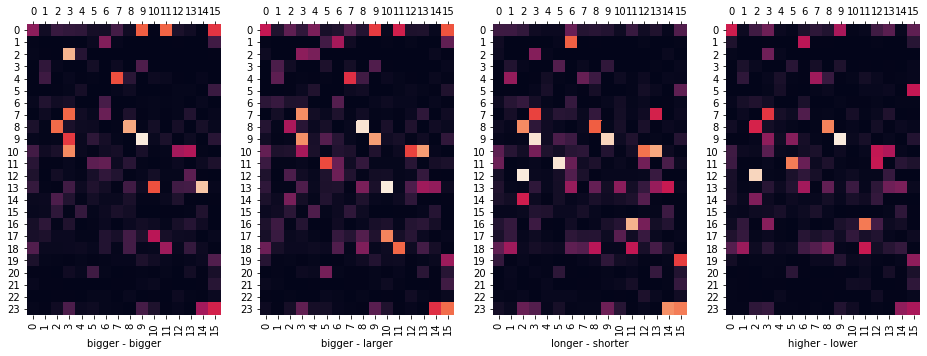

In [307]:
fig, axs = plt.subplots(1,len(all_attn_probs),sharey=False, figsize=(4 * len(all_attn_probs), 6))
for attn_probs, (p, h), tokens, ax in zip(all_attn_probs, idx_pairs, tokenses, axs):
    ax = sns.heatmap(attn_probs[:, :, h, p], square=True, cbar=False, ax=ax)
    ax.tick_params(top=True, labeltop=True)
    ax.set_xlabel('%s - %s' % (tokens[p], tokens[h]))

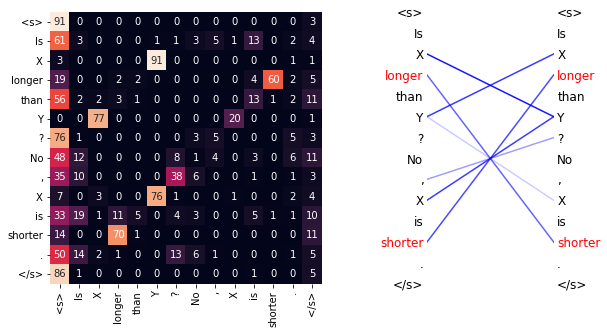

In [309]:
i = 2
layer, head = 12, 2
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)
plot_head_attn(attn, tokens, ax1=ax1) 

In [300]:
def plot_head_attn(attn, tokens, ax1=None):
    assert attn.size(0) == attn.size(1) == len(tokens)
#     fig = plt.figure(figsize=(4, round(attn.size(0) / 4)))
    if ax1 is None: ax1 = plt.gca()
    for i in range(attn.size(0)):
        for j in range(attn.size(1)):
            if j in [0, attn.size(1) - 1] or attn[i, j].item() < 0.2: continue
            plt.plot([0, 1], [i, j], color='b', alpha=attn[i, j].item())
    ax1.set_xticks([0, 1])
    ax1.set_xlim(0, 1)
    ax1.axes.xaxis.set_visible(False)

    ax2 = ax1.twinx()
    for ax in [ax1, ax2]: # has to duplicate axes to set color of yticklabel
        ax.set_yticks(np.arange(attn.size(0)))
        ax.set_yticklabels(tokens, fontsize=12)
        for i, yticklabel in enumerate(ax.get_yticklabels()):
            if i in [p, h]:
                yticklabel.set_color('r')
        ax.tick_params(length=0)
        ax.set_ylim(attn.size(0) - 1, 0)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    plt.show()

In [267]:
output_sequences = model.generate(
    input_ids=input_ids,
    max_length=10 + len(input_ids[0]),
    temperature=1.,
    top_k=0,
    top_p=0,
    repetition_penalty=1,
    do_sample=True,
    num_return_sequences=1,
)

for s in output_sequences:
    print(tokenizer.decode(s))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


i i j j k k changes to i i j j l l.
a a b b c c changes to a a b b d d.
p p q q r r changes to p p q q r r r.
a


In [144]:
lines = open("../data/semantic_relations/BATS_3.0/4_Lexicographic_semantics/antonyms_comparable.txt").readlines()

In [73]:
def comparative_in_vocab(word, unk_id=unk_id):
    return all(tokenizer._convert_token_to_id('Ġ' + w) != unk_id for w in comparative(word).split())

In [276]:
adj = 'unlikely'
print(comparative(adj))
print(tokenizer.tokenize('It is %s.' % comparative(adj)))

more unlikely
['It', 'Ġis', 'Ġmore', 'Ġunlikely', '.']


In [291]:
import string
def random_string_generator_variable_size(min_size=3, max_size=12, allowed_chars=string.ascii_lowercase):
    return ''.join(random.choice(allowed_chars) for x in range(random.randint(min_size, max_size)))

s = 'uneasy'
print(comparative(s))
print(tokenizer.tokenize('It is %s.' % comparative(s)))

more uneasy
['It', 'Ġis', 'Ġmore', 'Ġuneasy', '.']


In [145]:
# lines = [line.strip() for line in lines if '\t' in line]
unk_id = tokenizer._convert_token_to_id('<unk>')
groups0 = []
for line in lines:
    head, tails = line.split()
    tails = tails.split('/')
    if comparative_in_vocab(head):
        tails = [tail for tail in tails if comparative_in_vocab(tail)]
        if len(tails) > 0:
            print(head, tails)
            groups0.append([head, tails[:2]])
print(len(groups0))

abundant ['tight', 'insufficient', 'deficient']
beautiful ['grotesque', 'monstrous', 'hideous', 'awkward']
big ['small', 'atomic', 'microscopic', 'micro', 'miniature']
bright ['neutral', 'faded']
cheap ['expensive']
clear ['unclear', 'undefined']
close ['distant', 'removed', 'far', '']
colorful ['neutral', 'faded']
common ['uncommon', 'extraordinary']
competent ['incompetent', 'inefficient']
concerned ['casual', 'detached', 'indifferent', 'careless']
cooked ['natural']
dangerous ['safe', 'harmless']
decisive ['hesitant']
energetic ['inactive']
familiar ['unfamiliar', 'strange', 'unknown', 'foreign', 'strange', 'unknown']
full ['stripped', 'clean', 'lifeless', 'looted', 'vacant']
generous ['cheap', 'close', 'near', 'tight', 'selfish']
happy ['melancholy', 'tragic']
hard ['soft', 'brushed', 'padded', 'yielding', 'velvet']
hot ['cold', 'cool']
interesting ['boring', 'slow', 'tedious']
large ['small', 'little', 'atomic', 'microscopic', 'micro', 'miniature']
long ['short', 'shortened', 'cli

In [146]:
lines = open("../data/semantic_relations/am-for-bert/dataset/antonyms_comparable.txt").readlines()

In [147]:
groups1 = []
for line in lines:
    parts = line.split()
    assert len(parts) in [7, 9], line
    if len(parts) == 7:
        _, subset, head, head_info, relation, tail, tail_info = parts
        tails = [tail]
    else:
        _, subset, head, head_info, relation, tail, tail_info, tail2, tail2_info = parts
        tails = [tail, tail2]
    assert relation == 'antonym'
    if comparative_in_vocab(head):
        tails = [tail for tail in tails if comparative_in_vocab(tail)]
        if len(tails) > 0:
            print(head, tails)
            groups1.append([head, tails])
print(len(groups1))

new ['old']
many ['few']
high ['low']
general ['specific']
international ['national']
local ['national']
small ['big', 'large']
large ['little', 'small']
much ['little']
old ['young']
few ['many']
popular ['unpopular']
young ['old']
northern ['southern']
married ['unmarried']
southern ['northern']
little ['big', 'large']
good ['bad']
available ['unavailable']
successful ['unsuccessful']
natural ['unnatural']
big ['little', 'small']
strong ['weak']
limited ['unlimited']
low ['high']
foreign ['domestic']
related ['unrelated']
legal ['illegal']
specific ['general']
hard ['easy']
likely ['unlikely']
clear ['unclear']
difficult ['easy']
rural ['urban']
potential ['actual']
normal ['abnormal']
necessary ['unnecessary']
nuclear ['conventional']
bad ['good']
positive ['negative']
internal ['external']
effective ['ineffective']
actual ['potential']
rich ['poor']
domestic ['foreign']
formal ['informal']
external ['internal']
easy ['difficult']
affected ['unaffected']
experienced ['inexperienced'

In [148]:
new_groups1, added_groups0 = [], []
for group1 in groups1:
    head1, tails1 = group1
    drop = False
    for group0 in groups0:
        head0, tails0 = group0
        if head1 == head0 or head1 in tails0:
            if head1 == head0 and not set(tails1).issubset(set(tails0)):
                print(group1, group0, '->', end=' ')
                for t in tails1:
                    if t not in tails0:
                        tails0.insert(0, t)
                group0[1] = tails0[:2]
                print(group0)
            elif head1 in tails0:
                new_heads0 = set(tails1) - set(head for head, tails in groups0 if head1 in tails)
                if len(new_heads0) > 0:
                    print(group1, group0, '+', end=' ')
                    added_group0 = [[head, tails0] for head in new_heads0]
                    added_groups0 += added_group0
                    print(added_group0)
            drop = True
            break
    if not drop:
        new_groups1.append(group1)
    else:
        print(group1, 'dropped')
groups0 += added_groups0
print(len(new_groups1), len(added_groups0))

['small', ['big', 'large']] dropped
['large', ['little', 'small']] dropped
['old', ['young']] dropped
['young', ['old']] dropped
['little', ['big', 'large']] ['large', ['small', 'little']] +
[['big', ['small', 'little']]]
['little', ['big', 'large']] dropped
['natural', ['unnatural']] ['cooked', ['natural']] +
[['unnatural', ['natural']]]
['natural', ['unnatural']] dropped
['big', ['little', 'small']] ['big', ['small', 'atomic']] ->
['big', ['little', 'small']]
['big', ['little', 'small']] dropped
['hard', ['easy']] ['hard', ['soft', 'brushed']] ->
['hard', ['easy', 'soft']]
['hard', ['easy']] dropped
['clear', ['unclear']] dropped
['difficult', ['easy']] ['simple', ['difficult', 'challenging']] +
[['easy', ['difficult', 'challenging']]]
['difficult', ['easy']] dropped
['normal', ['abnormal']] dropped
['rich', ['poor']] dropped
['easy', ['difficult']] ['hard', ['easy', 'soft']] +
[['difficult', ['easy', 'soft']]]
['easy', ['difficult']] dropped
['safe', ['dangerous']] dropped
['happy',

In [163]:
[[[head], tails] for head, tails in new_groups1]

[[['new'], ['old']],
 [['many'], ['few']],
 [['high'], ['low']],
 [['general'], ['specific']],
 [['international'], ['national']],
 [['local'], ['national']],
 [['much'], ['little']],
 [['few'], ['many']],
 [['popular'], ['unpopular']],
 [['northern'], ['southern']],
 [['married'], ['unmarried']],
 [['southern'], ['northern']],
 [['good'], ['bad']],
 [['available'], ['unavailable']],
 [['successful'], ['unsuccessful']],
 [['strong'], ['weak']],
 [['limited'], ['unlimited']],
 [['low'], ['high']],
 [['foreign'], ['domestic']],
 [['related'], ['unrelated']],
 [['legal'], ['illegal']],
 [['specific'], ['general']],
 [['likely'], ['unlikely']],
 [['rural'], ['urban']],
 [['potential'], ['actual']],
 [['necessary'], ['unnecessary']],
 [['nuclear'], ['conventional']],
 [['bad'], ['good']],
 [['positive'], ['negative']],
 [['internal'], ['external']],
 [['effective'], ['ineffective']],
 [['actual'], ['potential']],
 [['domestic'], ['foreign']],
 [['formal'], ['informal']],
 [['external'], ['i

In [160]:
[[[head], tails] for head, tails in groups0]

[[['abundant'], ['tight', 'insufficient']],
 [['beautiful'], ['grotesque', 'monstrous']],
 [['big'], ['little', 'small']],
 [['bright'], ['neutral', 'faded']],
 [['cheap'], ['expensive']],
 [['clear'], ['unclear', 'undefined']],
 [['close'], ['distant', 'removed']],
 [['colorful'], ['neutral', 'faded']],
 [['common'], ['uncommon', 'extraordinary']],
 [['competent'], ['incompetent', 'inefficient']],
 [['concerned'], ['casual', 'detached']],
 [['cooked'], ['natural']],
 [['dangerous'], ['safe', 'harmless']],
 [['decisive'], ['hesitant']],
 [['energetic'], ['inactive']],
 [['familiar'], ['unfamiliar', 'strange']],
 [['full'], ['stripped', 'clean']],
 [['generous'], ['cheap', 'close']],
 [['happy'], ['unhappy', 'melancholy']],
 [['hard'], ['easy', 'soft']],
 [['hot'], ['cold', 'cool']],
 [['interesting'], ['boring', 'slow']],
 [['large'], ['small', 'little']],
 [['long'], ['short', 'shortened']],
 [['normal'], ['abnormal', 'irregular']],
 [['rich'], ['poor', 'broke']],
 [['short'], ['tall'

In [381]:
def first(): return 0
def last(): return -1
def middle(): return 

def _inc(val):
    return str((int(val) + 1) % 10) if val.isdigit() else next_alpha(val)

def _dec(val):
    return str((int(val) - 1) % 10) if val.isdigit() else prev_alpha(val)

def inc(pos, val):
    if type(val) == list:
        return pos, list(map(_inc, val))
    return pos, _inc(val)

def dec(pos, val):
    if type(val) == list:
        return pos, list(map(_dec, val))
    return pos, _dec(val)

def upper(x): return x.upper()
def lower(x): return x.lower()



In [387]:
def twice(pos, val):
    val =  val * 2 if type(val) == list else [val] * 2
    return pos, val

def thrice(item):
    val =  val * 3 if type(val) == list else [val] * 3
    return pos, val

In [390]:
twice(0, ['a', 'a'])

(0, ['a', 'a', 'a', 'a'])

In [351]:
def next_alpha(s):
    assert len(s) == 1 and s.isalpha()
    start = ord('A') if s.isupper() else ord('a')
    return chr((ord(s) + 1 - start) % 26 + start)

def prev_alpha(s):
    assert len(s) == 1 and s.isalpha()
    start = ord('A') if s.isupper() else ord('a')
    return chr((ord(s) - 1 - start + 26) % 26 + start)

In [354]:
prev_alpha('A')

'Z'